## “Why did you choose your methodology?”

## “How was this implemented?”

## “Why does this work?”

## “How did you verify results?”

## “Why is this method superior to what is used in the industry?”

## 1.1 Loading Data

In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.figure_factory import create_distplot
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)

In [280]:
housingdf = pd.read_csv('./Datasets/train.csv')
housingdf = housingdf.drop(['Id'], axis = 1)

In [281]:
testdf = pd.read_csv('./Datasets/test.csv')
testdf = testdf.drop(['Id'], axis = 1)

In [282]:
print(housingdf.shape)
print(testdf.shape)

(1460, 80)
(1459, 79)


In [283]:
housingdf.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [284]:
testdf.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [285]:
totaldf = pd.concat([housingdf, testdf], axis = 0, ignore_index = False)


In [286]:
#drop the response variable
totaldf = totaldf.drop(['SalePrice'], axis = 1)


In [287]:
totaldf.shape

(2919, 79)

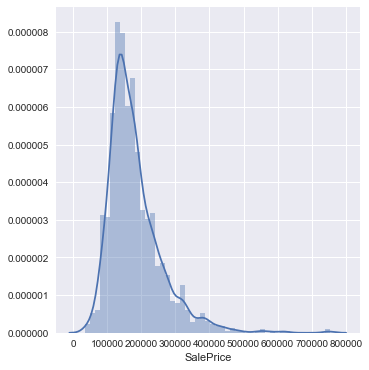

In [288]:
plt.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.subplot(1, 2, 1)
sns.distplot(housingdf['SalePrice'])


In [289]:
hist_data = [np.array(np.log1p(housingdf['SalePrice']))]
group_labels = ['Log Sales Price Distribution']
fig = ff.create_distplot(hist_data, group_labels, bin_size=.1)
py.offline.iplot(fig, filename='Basic Distplot')

## 1.2 Imputation & Visualization

In [290]:
import missingno as msno
%matplotlib inline

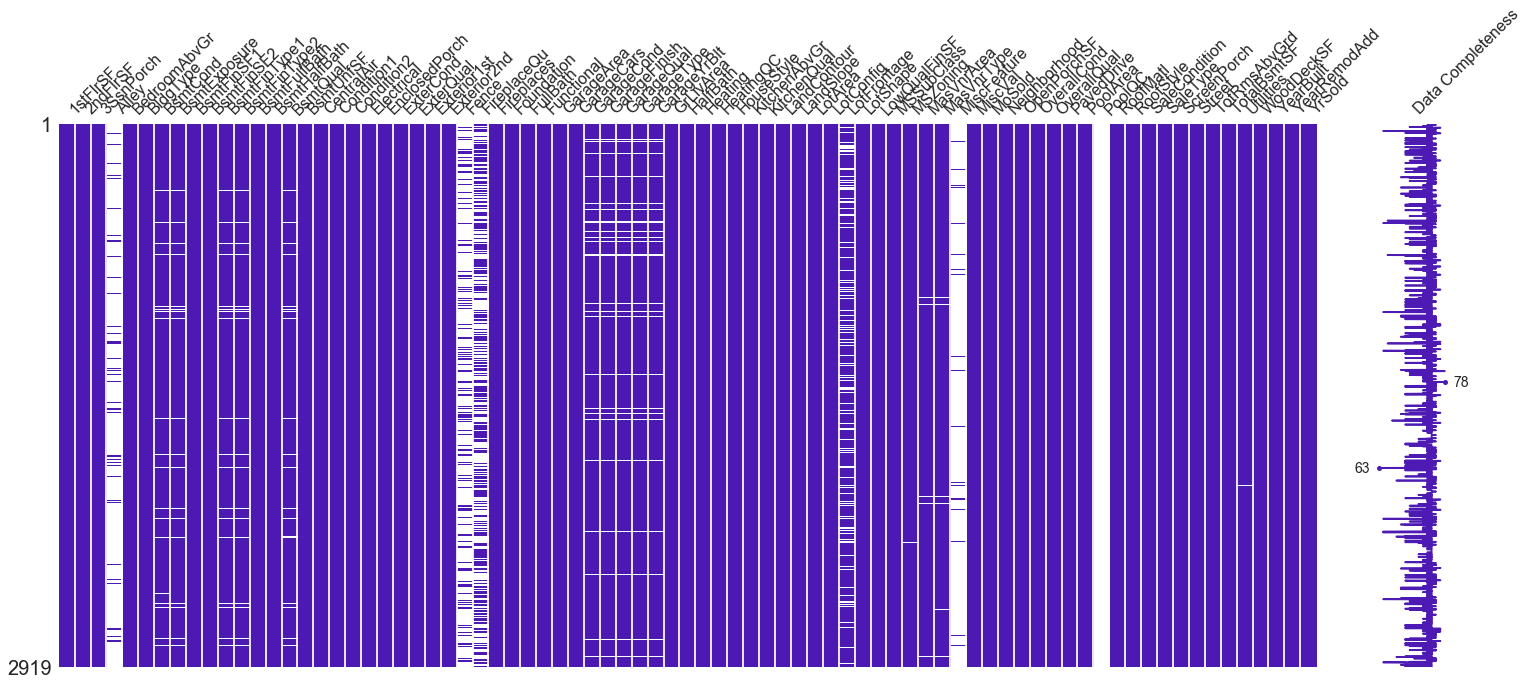

In [291]:
#overall missing data visualization
msno.matrix(totaldf, color=(0.3, 0.1, 0.7), labels = True)

In [292]:
missingcolumns = totaldf.isnull().sum().sort_values(ascending = False)
missingpercentage = (totaldf.isnull().sum()/len(totaldf)).sort_values(ascending = False)
missingdf = pd.DataFrame({'missing_column': missingcolumns.index.tolist(), 'missing_numbers': missingcolumns.values.tolist(), 'missing_percentage': missingpercentage.values.tolist()})
missingdf = missingdf[missingdf['missing_numbers']>0]
missingdf

,missing_column,missing_numbers,missing_percentage
0,PoolQC,2909,0.996574
1,MiscFeature,2814,0.964029
2,Alley,2721,0.932169
3,Fence,2348,0.804385
4,FireplaceQu,1420,0.486468
5,LotFrontage,486,0.166495
6,GarageFinish,159,0.054471
7,GarageQual,159,0.054471
8,GarageYrBlt,159,0.054471
9,GarageCond,159,0.054471


In [293]:
#missing data with barplots

missing_counts = go.Bar(x=missingdf['missing_column'].tolist(),
                  y=missingdf['missing_numbers'].tolist(),
                  marker=dict(color='rgb(166,206,227)'))


data = [missing_counts]

layout = go.Layout(title="Missing Data Counts",
                xaxis=dict(title='Missing Columns',tickangle=30),
                yaxis=dict(title='Counts'))

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)





In [294]:
#missing data with barplots

missing_percentage = go.Bar(x=missingdf['missing_column'].tolist(),
                  y=missingdf['missing_percentage'].tolist(),
                  marker=dict(color='rgb(166,206,227)'))


data = [missing_percentage]

layout = go.Layout(title="Missing Data Percentage",
                xaxis=dict(title='Missing Columns',tickangle=30),
                yaxis=dict(title='Missing Percentage'))

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)




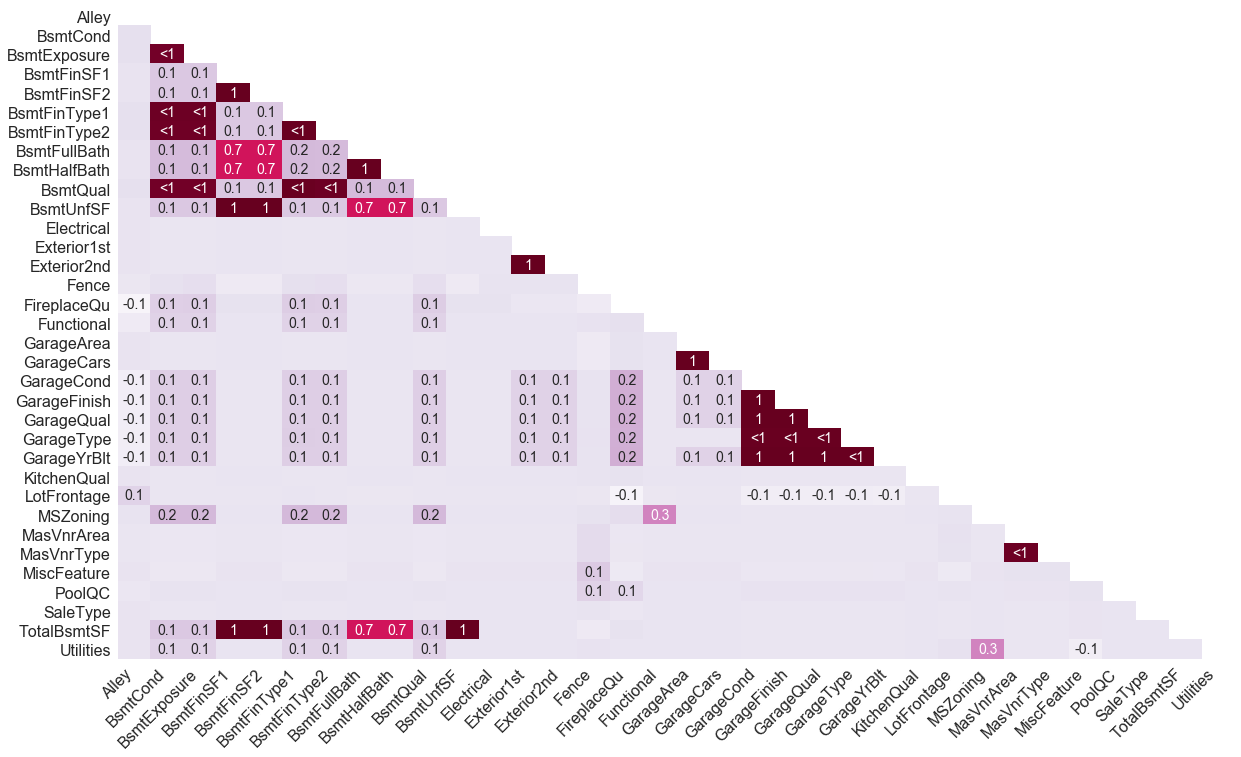

In [295]:
#correlation between missing data
msno.heatmap(totaldf, cmap = 'PuRd')



In [296]:
totaldf.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [297]:
totalmissingdf = totaldf[missingdf['missing_column'].tolist()]
totalmissingdf

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageFinish,GarageQual,GarageYrBlt,GarageCond,...,Exterior2nd,KitchenQual,GarageCars,Exterior1st,GarageArea,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,SaleType
0,NaN,NaN,NaN,NaN,NaN,65.0,RFn,TA,2003.0,TA,...,VinylSd,Gd,2.0,VinylSd,548.0,856.0,150.0,0.0,706.0,WD
1,NaN,NaN,NaN,NaN,TA,80.0,RFn,TA,1976.0,TA,...,MetalSd,TA,2.0,MetalSd,460.0,1262.0,284.0,0.0,978.0,WD
2,NaN,NaN,NaN,NaN,TA,68.0,RFn,TA,2001.0,TA,...,VinylSd,Gd,2.0,VinylSd,608.0,920.0,434.0,0.0,486.0,WD
3,NaN,NaN,NaN,NaN,Gd,60.0,Unf,TA,1998.0,TA,...,Wd Shng,Gd,3.0,Wd Sdng,642.0,756.0,540.0,0.0,216.0,WD
4,NaN,NaN,NaN,NaN,TA,84.0,RFn,TA,2000.0,TA,...,VinylSd,Gd,3.0,VinylSd,836.0,1145.0,490.0,0.0,655.0,WD
5,NaN,Shed,NaN,MnPrv,NaN,85.0,Unf,TA,1993.0,TA,...,VinylSd,TA,2.0,VinylSd,480.0,796.0,64.0,0.0,732.0,WD
6,NaN,NaN,NaN,NaN,Gd,75.0,RFn,TA,2004.0,TA,...,VinylSd,Gd,2.0,VinylSd,636.0,1686.0,317.0,0.0,1369.0,WD
7,NaN,Shed,NaN,NaN,TA,NaN,RFn,TA,1973.0,TA,...,HdBoard,TA,2.0,HdBoard,484.0,1107.0,216.0,32.0,859.0,WD
8,NaN,NaN,NaN,NaN,TA,51.0,Unf,Fa,1931.0,TA,...,Wd Shng,TA,2.0,BrkFace,468.0,952.0,952.0,0.0,0.0,WD
9,NaN,NaN,NaN,NaN,TA,50.0,RFn,Gd,1939.0,TA,...,MetalSd,TA,1.0,MetalSd,205.0,991.0,140.0,0.0,851.0,WD


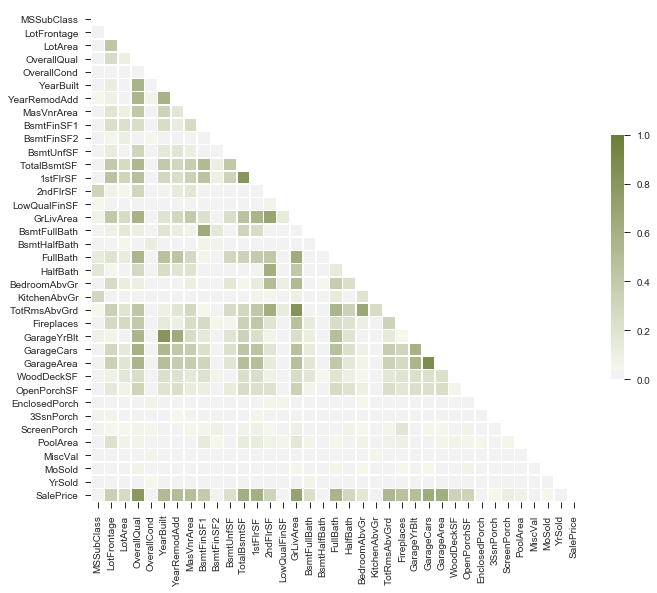

In [301]:
#create a correlation matrix with all numeric columns

sns.set(style="ticks")

# take the numerical columns
data = pd.DataFrame(data= numericdf,
                 columns=numericdf.columns.tolist())

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(50, 100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin = 0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})




## 2.1 Train Test Split

In [ ]:
#80% train 20% test split

## 2.2 Feature Engineering & Visualization

In [299]:
#Pearson Correlation Plot 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericdf = housingdf.select_dtypes(include=numerics)


In [300]:
numericdf.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [167]:
#Kendall Correlation Plot



In [ ]:
#Cramér's V Correlation Plot



In [ ]:
#Correlation between Ordinal Variables and Sales Prices



In [166]:
#Boxplot with Median Price and Neighborhoods

N = len(totalgamecategory)     # Number of boxes

# generate an array of rainbow colors by fixing the saturation and lightness of the HSL representation of colour 
# and marching around the hue. 

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

#loading the data with filters
data = [{
    'y': gamedf.starrating[gamedf.gamecategory == j],
    'name': j,
    'type':'box',
    'marker':{'color': c[i]}
    } for i, j in enumerate(totalgamecategory)]


# format the layout
layout = go.Layout(title="Average Rating for Every Game Category",
                xaxis=dict(title='Game Category'),
                yaxis=dict(title='Average Rating'))


fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)
